In [1]:
import pandas as pd
import numpy as np
import scipy as scipy
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import iqr

In [13]:
df = pd.read_csv('games.csv')

In [16]:
df = df.dropna()

In [56]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [20]:
df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [47]:
df.Publisher.value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Mirai Shounen                      1
Commseed                           1
Enjoy Gaming ltd.                  1
Starpath Corp.                     1
Team17 Software                    1
Name: Publisher, Length: 576, dtype: int64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


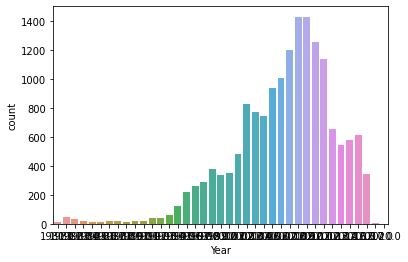

In [35]:
sns.countplot(df.Year)

In [46]:
scipy.stats.mode(df.Publisher)

ModeResult(mode=array(['Electronic Arts'], dtype=object), count=array([1339]))

In [49]:
df.describe(include='all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291,16291,16291.000000,16291,16291,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
unique,NaN,11325,31,NaN,12,576,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2131,NaN,3251,1339,NaN,NaN,NaN,NaN,NaN
mean,8290.190228,NaN,NaN,2006.405561,NaN,NaN,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,NaN,NaN,5.832412,NaN,NaN,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.480000


In [67]:
df1 = df.query('Publisher == "Nintendo"')

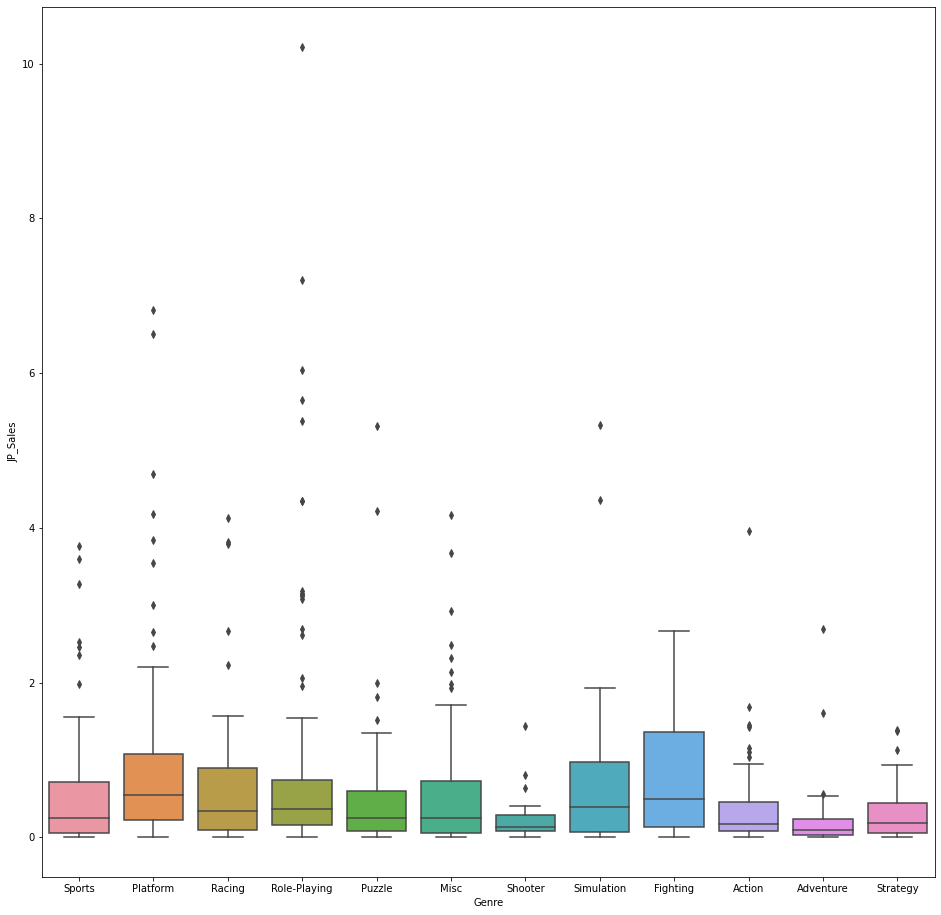

In [68]:
plt.figure(figsize=(16,16))
sns.boxplot(x='Genre', y='JP_Sales', data=df1)

In [71]:
df2 = df1.groupby(['Genre', 'Year'], as_index=False).sum().query("Genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')")

In [72]:
df2

,Genre,Year,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
42,Fighting,1987.0,1114,2.80,0.65,1.87,0.10,5.42
43,Fighting,1993.0,851,0.52,0.16,1.29,0.03,2.00
44,Fighting,1995.0,423,2.26,0.72,0.12,0.10,3.20
45,Fighting,1996.0,10944,0.61,0.19,0.17,0.01,0.99
46,Fighting,1999.0,158,2.95,0.60,1.97,0.04,5.55
...,...,...,...,...,...,...,...,...
240,Sports,2010.0,12908,0.90,0.51,0.63,0.14,2.18
241,Sports,2012.0,12243,0.26,0.29,0.44,0.05,1.05
242,Sports,2013.0,4942,0.78,0.46,0.34,0.12,1.69
243,Sports,2014.0,8947,0.34,0.28,0.21,0.06,0.88


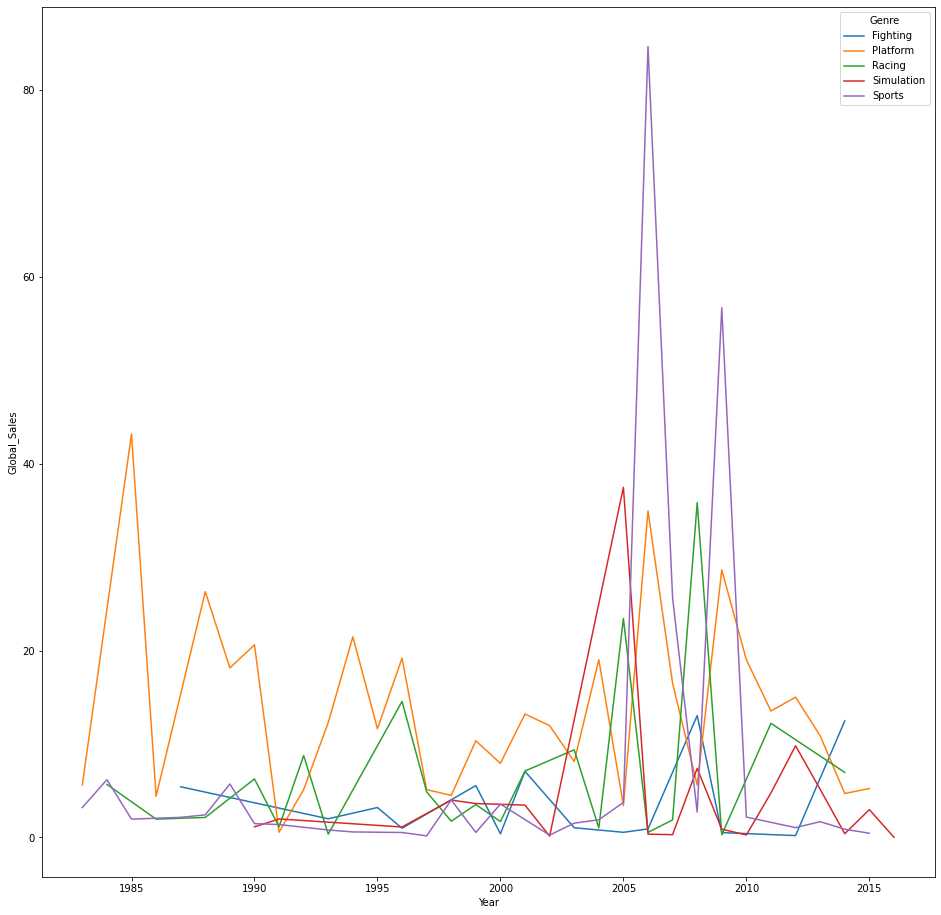

In [77]:
plt.figure(figsize=(16,16))
sns.lineplot(x = 'Year', y = 'Global_Sales', hue = 'Genre', data=df2)